In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset
data = pd.read_csv('climate_change_impact_on_agriculture_2024.csv')

In [2]:
data.head()

Year Country         Region  Crop_Type  Average_Temperature_C  \
0  2001   India    West Bengal       Corn                   1.55   
1  2024   China          North       Corn                   3.23   
2  2001  France  Ile-de-France      Wheat                  21.11   
3  2001  Canada       Prairies     Coffee                  27.85   
4  1998   India     Tamil Nadu  Sugarcane                   2.19   

   Total_Precipitation_mm  CO2_Emissions_MT  Crop_Yield_MT_per_HA  \
0                  447.06             15.22                 1.737   
1                 2913.57             29.82                 1.737   
2                 1301.74             25.75                 1.719   
3                 1154.36             13.91                 3.890   
4                 1627.48             11.81                 1.080   

   Extreme_Weather_Events  Irrigation_Access_%  Pesticide_Use_KG_per_HA  \
0                       8                14.54                    10.08   
1                       8                11.05                    33.06   
2                       5                84.42                    27.41   
3                       5                94.06                    14.38   
4                       9                95.75                    44.35   

   Fertilizer_Use_KG_per_HA  Soil_Health_Index Adaptation_Strategies  \
0                     14.78              83.25      Water Management   
1                     23.25              54.02         Crop Rotation   
2                     65.53              67.78      Water Management   
3                     87.58              91.39         No Adaptation   
4                     88.08              49.61         Crop Rotation   

   Economic_Impact_Million_USD  
0                       808.13  
1                       616.22  
2                       796.96  
3                       790.32  
4                       401.72

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Year                         10000 non-null  int64  
 1   Country                      10000 non-null  object 
 2   Region                       10000 non-null  object 
 3   Crop_Type                    10000 non-null  object 
 4   Average_Temperature_C        10000 non-null  float64
 5   Total_Precipitation_mm       10000 non-null  float64
 6   CO2_Emissions_MT             10000 non-null  float64
 7   Crop_Yield_MT_per_HA         10000 non-null  float64
 8   Extreme_Weather_Events       10000 non-null  int64  
 9   Irrigation_Access_%          10000 non-null  float64
 10  Pesticide_Use_KG_per_HA      10000 non-null  float64
 11  Fertilizer_Use_KG_per_HA     10000 non-null  float64
 12  Soil_Health_Index            10000 non-null  float64
 13  Adaptation_Strate

In [4]:
data.isnull().sum()

Year                           0
Country                        0
Region                         0
Crop_Type                      0
Average_Temperature_C          0
Total_Precipitation_mm         0
CO2_Emissions_MT               0
Crop_Yield_MT_per_HA           0
Extreme_Weather_Events         0
Irrigation_Access_%            0
Pesticide_Use_KG_per_HA        0
Fertilizer_Use_KG_per_HA       0
Soil_Health_Index              0
Adaptation_Strategies          0
Economic_Impact_Million_USD    0
dtype: int64

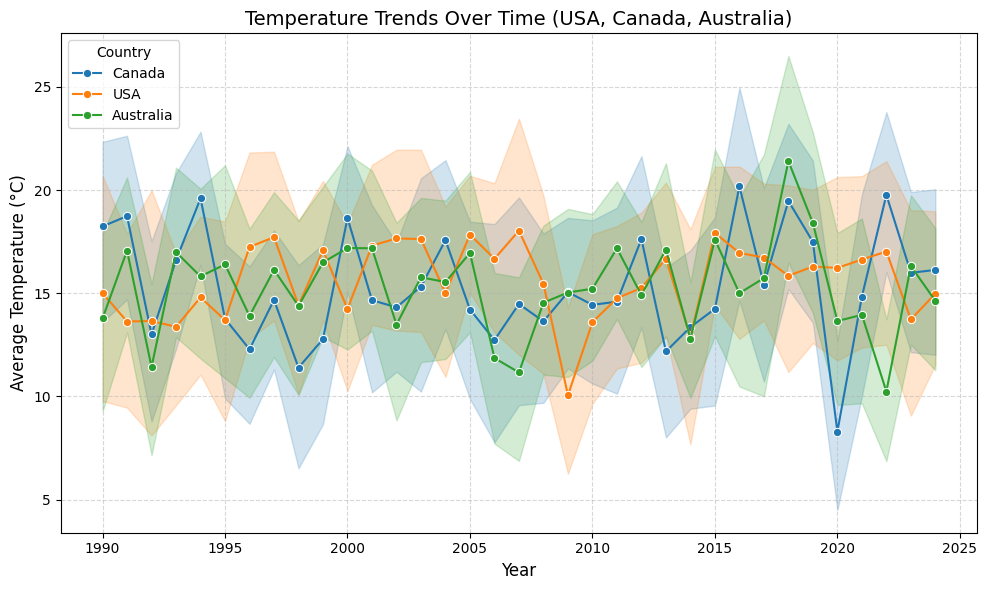

In [ ]:
# Filtering data for USA, Canada, and Australia
countries_of_interest = ['USA', 'Canada', 'Australia']
filtered_data = data[data['Country'].isin(countries_of_interest)]

# Line plot: Temperature trends over time for USA, Canada, and Australia
plt.figure(figsize=(10, 6))
sns.lineplot(data=filtered_data, x='Year', y='Average_Temperature_C', hue='Country', marker='o')
plt.title('Temperature Trends Over Time (USA, Canada, Australia)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Temperature (°C)', fontsize=12)
plt.legend(title='Country', fontsize=10, loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

<ipython-input-6-68080f9fd1d2>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_data, x='Country', y='Crop_Yield_MT_per_HA', palette='Set2')


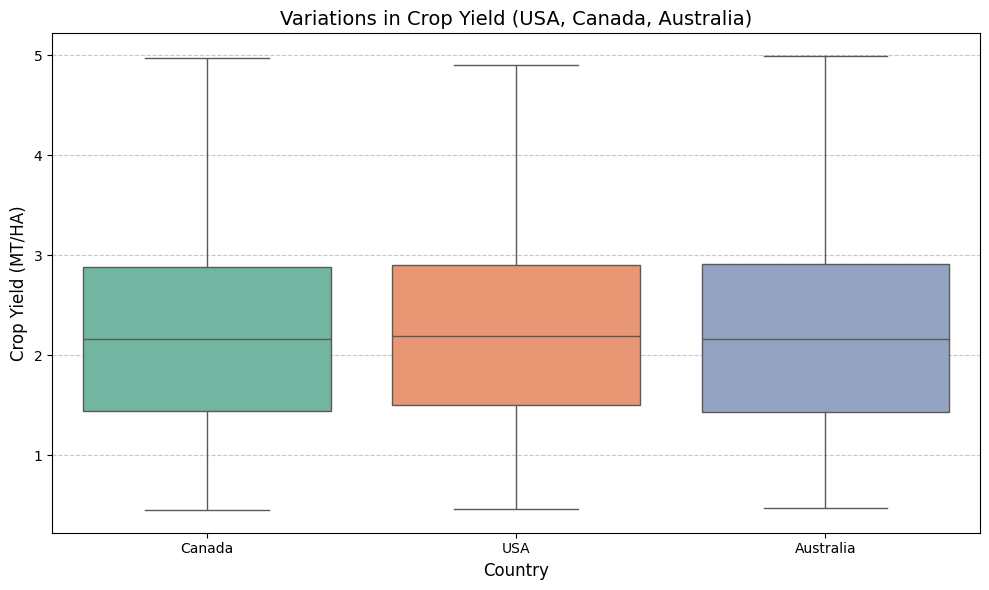

In [ ]:
# Filtering data for USA, Canada, and Australia
countries_of_interest = ['USA', 'Canada', 'Australia']
filtered_data = data[data['Country'].isin(countries_of_interest)]

# Box plot: Crop yield variations for USA, Canada, and Australia
plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_data, x='Country', y='Crop_Yield_MT_per_HA', palette='Set2')
plt.title('Variations in Crop Yield (USA, Canada, Australia)', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Crop Yield (MT/HA)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

In [7]:
# Plot 3: Crop Yield vs. Precipitation
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=filtered_data,
    x='Total_Precipitation_mm',
    y='Crop_Yield_MT_per_HA',
    hue='Country',
    palette='Set1',
    s=100,
    alpha=0.8
)
plt.title('Crop Yield vs. Precipitation (USA, Canada, Australia)', fontsize=14)
plt.xlabel('Total Precipitation (mm)', fontsize=12)
plt.ylabel('Crop Yield (MT/HA)', fontsize=12)
plt.legend(title='Country')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

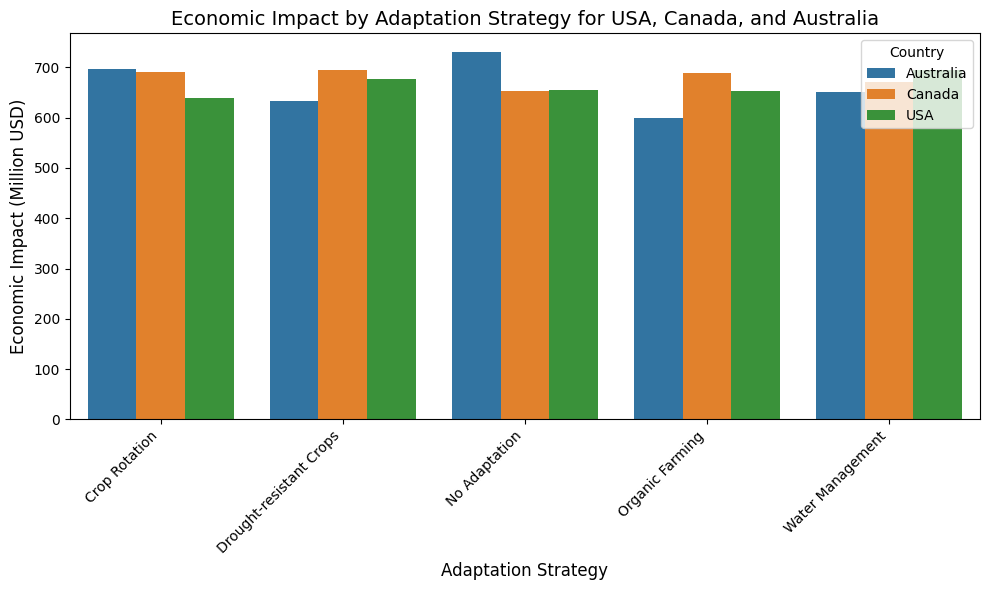

In [ ]:
# Plot: Economic Impact by Adaptation Strategy for USA, Canada, and Australia

# Grouping by Adaptation Strategy and calculate the mean economic impact for each country
grouped_data = filtered_data.groupby(['Country', 'Adaptation_Strategies'])['Economic_Impact_Million_USD'].mean().reset_index()

# Creating a bar plot showing economic impact for each adaptation strategy
plt.figure(figsize=(10, 6))
sns.barplot(x='Adaptation_Strategies', y='Economic_Impact_Million_USD', hue='Country', data=grouped_data)

# Adding labels and title
plt.title('Economic Impact by Adaptation Strategy for USA, Canada, and Australia', fontsize=14)
plt.xlabel('Adaptation Strategy', fontsize=12)
plt.ylabel('Economic Impact (Million USD)', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Country')

# the plot
plt.tight_layout()

In [ ]:
# Summary table for all four plots

# 1. Temperature Trends (average temperature over years)
temperature_trends = filtered_data.groupby('Country')['Average_Temperature_C'].mean().reset_index()

# 2. Crop Yield Variations (average crop yield over years)
crop_yield_variation = filtered_data.groupby('Country')['Crop_Yield_MT_per_HA'].mean().reset_index()

# 3. Crop Yield vs Precipitation (average crop yield and precipitation)
crop_precipitation = filtered_data.groupby('Country')[['Crop_Yield_MT_per_HA', 'Total_Precipitation_mm']].mean().reset_index()

# 4. Economic Impact by Adaptation Strategy (average economic impact per adaptation strategy)
economic_impact_by_strategy = filtered_data.groupby(['Country', 'Adaptation_Strategies'])['Economic_Impact_Million_USD'].mean().reset_index()

# Merging the dataframes to create a comprehensive summary table
summary_table = temperature_trends.merge(crop_yield_variation, on='Country', suffixes=('_Temp', '_Yield'))
summary_table = summary_table.merge(crop_precipitation, on='Country', how='left')
summary_table = summary_table.merge(economic_impact_by_strategy[['Country', 'Economic_Impact_Million_USD']], on='Country', how='left')


# the table
print(summary_table)

      Country  Average_Temperature_C  Crop_Yield_MT_per_HA_x  \
0   Australia              15.181008                2.232587   
1   Australia              15.181008                2.232587   
2   Australia              15.181008                2.232587   
3   Australia              15.181008                2.232587   
4   Australia              15.181008                2.232587   
5      Canada              15.374309                2.229325   
6      Canada              15.374309                2.229325   
7      Canada              15.374309                2.229325   
8      Canada              15.374309                2.229325   
9      Canada              15.374309                2.229325   
10        USA              15.675882                2.238157   
11        USA              15.675882                2.238157   
12        USA              15.675882                2.238157   
13        USA              15.675882                2.238157   
14        USA              15.675882    